Описательная статистика (статистические характеристики, графики, взаимосвязь величин, дисперсионный анализ).
Проверить гипотезу: зарплаты администрации при президенте Обама (2009-2016г) в среднем такие же, как при Трампе (2017г). По годам расчитать основные статистические показатели: мода, медиана, квартили, дисперсию. Посмотреть изменение средних зарплат во времени.

In [1]:
import pandas as pd
import numpy as np

In [356]:
#Обама за период 2009-2016
df1 = pd.read_csv('Obama.csv')
df1 = df1.copy()
#Трамп за 2017
df2 = pd.read_csv('Tramp.csv')
df2 = df2.copy()

In [357]:
df1.head()

,name,status,pay_basis,title,year,salary
0,"Abraham, Yohannes A.",Employee,Per Annum,LEGISLATIVE ASSISTANT AND ASSISTANT TO THE HOU...,2009,40000
1,"Abrams, Adam W.",Employee,Per Annum,WESTERN REGIONAL COMMUNICATIONS DIRECTOR,2009,65000
2,"Adams, Ian H.",Employee,Per Annum,EXECUTIVE ASSISTANT TO THE DIRECTOR OF SCHEDUL...,2009,36000
3,"Agnew, David P.",Employee,Per Annum,DEPUTY DIRECTOR OF INTERGOVERNMENTAL AFFAIRS,2009,92000
4,"Ahrens, Rebecca A.",Employee,Per Annum,OPERATOR,2009,42800


In [358]:
df1['year'].value_counts()

2009    487
2015    474
2016    472
2010    469
2012    468
2013    460
2014    456
2011    454
Name: year, dtype: int64

In [359]:
df2.head()

,NAME,STATUS,PAY BASIS,POSITION TITLE,salary
0,"Alexander, Monica K.",Employee,Per Annum,EXECUTIVE ASSISTANT,56000
1,"Ambrosini, Michael J.",Employee,Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT AND DIRECTO...,95000
2,"Amin, Stacy C.",Employee,Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT AND ASSOCIA...,140000
3,"Andersen, Whitney N.",Employee,Per Annum,DEPUTY DIRECTOR OF OPERATIONS FOR THE WHITE HO...,94000
4,"Anderson, Alexander J.",Employee,Per Annum,DIRECTOR OF DIGITAL ENGAGEMENT,77000


In [360]:
#Разобьем по годам df1 и выберем только столбец зарплат
y2009 = df1.loc[df1['year']==2009, 'salary']
y2010 = df1.loc[df1['year']==2010, 'salary']
y2011 = df1.loc[df1['year']==2011, 'salary']
y2012 = df1.loc[df1['year']==2012, 'salary']
y2013 = df1.loc[df1['year']==2013, 'salary']
y2014 = df1.loc[df1['year']==2014, 'salary']
y2015 = df1.loc[df1['year']==2015, 'salary']
y2016 = df1.loc[df1['year']==2016, 'salary']

In [361]:
#Зарплата Обама за весь период
y1 = df1['salary']
#Зарплата Трамп за 2017 г.
y2 = df2['salary']

__1) Найдем выборочное среднее зарплат из датасета по формуле:__
$$\overline{x} = \dfrac{1}{m} \displaystyle\sum_{i = 1}^m x_i.$$

In [362]:
#Обама за весь период
#далее вычисления с помощью встроенных методов Python
y1_mean = y1.mean()
y1_mean

82490.75721925133

In [363]:
#Трамп за 2017 г.
y2_mean = y2.mean()
y2_mean

94872.0

In [364]:
#Обама за каждый год
y2009_mean = y2009.mean()
y2010_mean = y2010.mean()
y2011_mean = y2011.mean()
y2012_mean = y2012.mean()
y2013_mean = y2013.mean()
y2014_mean = y2014.mean()
y2015_mean = y2015.mean()
y2016_mean = y2016.mean()
y2009_mean, y2010_mean, y2011_mean, y2012_mean, y2013_mean, y2014_mean, y2015_mean, y2016_mean

(80384.43942505133,
 82721.33688699361,
 81765.33700440529,
 80843.13888888889,
 82303.86956521739,
 82844.13377192983,
 84864.12447257384,
 84223.625)

In [365]:
#При Трампе в 2017 году заметен скачок средней зарплаты, по сравнению с 2016 г примерно на 12%
#За 2009-2016 г не наблюдается линейного роста средней зарплаты.

__2)Cреднее квадратическое отклонение__ (уровень разброса элементов выборки относительно выборочного среднего):
$$\sigma = \sqrt{\dfrac{1}{m} \displaystyle\sum_{i = 1}^m (x_i - \overline{x})^2}.$$

In [366]:
#Обама за весь период
salary_std_1 = y1.std(ddof=0)
salary_std_1

40076.48159623784

In [367]:
#Обама за каждый год
salary_std_2009 = y2009.std(ddof=0)
salary_std_2010 = y2010.std(ddof=0)
salary_std_2011 = y2011.std(ddof=0)
salary_std_2012 = y2012.std(ddof=0)
salary_std_2013 = y2013.std(ddof=0)
salary_std_2014 = y2014.std(ddof=0)
salary_std_2015 = y2015.std(ddof=0)
salary_std_2016 = y2016.std(ddof=0)
salary_std_2009, salary_std_2010, salary_std_2011, salary_std_2012,salary_std_2013, salary_std_2014, salary_std_2015, salary_std_2016, 

(41974.708684954356,
 41545.07130638234,
 40069.87696785488,
 38934.23684876416,
 39315.21100558181,
 39164.68340598859,
 40348.82518034289,
 38812.06240640418)

In [368]:
#Трамп
salary_std_2 = y2.std(ddof=0)
salary_std_2

43055.141660624526

__3)Cмещённая выборочная дисперсия__:

$$\sigma^2 = \dfrac{1}{m} \displaystyle\sum_{i = 1}^m (x_i - \overline{x})^2.$$

In [369]:
#Обама за все время
salary_variance_12 = y1.var(ddof=0)
salary_variance_12

1606124377.1335907

In [370]:
#Обама за каждый год
salary_variance_2009_1 = y2009.var(ddof=0)
salary_variance_2010_1 = y2010.var(ddof=0)
salary_variance_2011_1 = y2011.var(ddof=0)
salary_variance_2012_1 = y2012.var(ddof=0)
salary_variance_2013_1 = y2013.var(ddof=0)
salary_variance_2014_1 = y2014.var(ddof=0)
salary_variance_2015_1 = y2015.var(ddof=0)
salary_variance_2016_1 = y2016.var(ddof=0)
salary_variance_2009_1, salary_variance_2010_1, salary_variance_2011_1, salary_variance_2012_1,salary_variance_2013_1, salary_variance_2014_1, salary_variance_2015_1, salary_variance_2016_1, 

(1761876169.1867824,
 1725992949.8523934,
 1605595040.219027,
 1515874798.9956646,
 1545685816.4134212,
 1533872426.2913177,
 1628027693.4338722,
 1506376188.2386122)

In [371]:
#Трамп
salary_variance_21 = y2.var(ddof=0)
salary_variance_21

1853745223.4164457

__4)Несмещённая__ __выборочная дисперсия__ :

$$\sigma_{\text{unbiased}}^2 = \dfrac{1}{m - 1} \displaystyle\sum_{i = 1}^m (x_i - \overline{x})^2.$$

In [372]:
#Обама за все время
salary_variance_22 = y1.var(ddof=1)
salary_variance_22

1606553937.0097964

In [373]:
#Обама за каждый год
salary_variance_2009_2 = y2009.var(ddof=1)
salary_variance_2010_2 = y2010.var(ddof=1)
salary_variance_2011_2 = y2011.var(ddof=1)
salary_variance_2012_2 = y2012.var(ddof=1)
salary_variance_2013_2 = y2013.var(ddof=1)
salary_variance_2014_2 = y2014.var(ddof=1)
salary_variance_2015_2 = y2015.var(ddof=1)
salary_variance_2016_2 = y2016.var(ddof=1)
salary_variance_2009_2, salary_variance_2010_2, salary_variance_2011_2, salary_variance_2012_2,salary_variance_2013_2, salary_variance_2014_2, salary_variance_2015_2, salary_variance_2016_2

(1765501428.7941625,
 1729680968.9760096,
 1609139400.1312103,
 1519120783.5759552,
 1549053323.6387227,
 1537243574.480969,
 1631469612.4474745,
 1509574439.1690552)

In [374]:
#Трамп
salary_variance_22 = y2.var(ddof=1)
salary_variance_22

1858675396.8829787

__5)Посмотрим наиболее часто встречающиеся в выборках значения__:

In [375]:
#Обама
y1.mode()

0    42000
dtype: int64

In [376]:
#Обама за каждый год
np.concatenate([y2009.mode(), y2010.mode(), y2011.mode(), y2012.mode(), y2013.mode(),y2014.mode(),y2015.mode(),y2016.mode()])

array([36000, 42000, 42000, 42000, 42000, 42420, 42420, 50730],
      dtype=int64)

In [377]:
#Трамп
y2.mode()

0    115000
dtype: int64

In [388]:
df1.loc[(df1['salary']==50730)&(df1['year']==2016)].head()

,name,status,pay_basis,title,year,salary
3276,"Allen, Angelica P.",Employee,Per Annum,SPECIAL ASSISTANT TO THE DIRECTOR OF THE OFFIC...,2016,50730
3301,"Bennett, Tabitha R.",Employee,Per Annum,PRESS LEAD,2016,50730
3302,"Bentley, Lauren G.",Employee,Per Annum,PRESS LEAD,2016,50730
3309,"Blume, Kolbie A.",Employee,Per Annum,SENIOR WRITER,2016,50730
3314,"Bowerman, Heidi L.",Employee,Per Annum,ASSISTANT DIRECTOR FOR CONSTITUENT ENGAGEMENT ...,2016,50730


In [398]:
df2.loc[df2['salary']==115000].head()

,NAME,STATUS,PAY BASIS,POSITION TITLE,salary
15,"Berkowitz, Avrahm J.",Employee,Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT AND ASSISTA...,115000
19,"Blase, Brian C.",Employee,Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT FOR ECONOMI...,115000
23,"Bock, Caroline E.",Employee,Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT AND ASSOCIA...,115000
24,"Boney, Virginia M.",Employee,Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT FOR LEGISLA...,115000
33,"Bullock, Katja",Employee,Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT AND ASSOCIA...,115000


In [400]:
df1.loc[(df1['title']=='SPECIAL ASSISTANT TO THE PRESIDENT FOR ECONOMIC POLICY')&(df1['year']==2016)].head()

,name,status,pay_basis,title,year,salary
3281,"Anderson, Charles D.",Employee,Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT FOR ECONOMI...,2016,110000
3442,"Hanlon, Seth D.",Employee,Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT FOR ECONOMI...,2016,121752
3443,"Harris, Adrienne A.",Employee,Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT FOR ECONOMI...,2016,121752
3485,"Kelly, Elizabeth A.",Employee,Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT FOR ECONOMI...,2016,111606
3618,"Raynor, Jessica J.",Employee,Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT FOR ECONOMI...,2016,121752


In [ ]:
#SPECIAL ASSISTANT TO THE PRESIDENT при Обаме получали немного больше, но в штате их было меньше. 
#Поэтому чаще всего при Обаме встречается зарплата порядка $42000, а при Трампе $115000 (люди с такой зарплатой 
#работаю на должности SPECIAL ASSISTANT TO THE PRESIDENT).

__6)Посчитаем медиану зарплат__ (ровно половина элементов из выборки меньше, либо равна 𝑎 (и, соответственно, ровно половина больше, либо равна 𝑎)):

In [261]:
#Обама
y1.median()

70000.0

In [425]:
#Обама за каждый год
y2009.median(), y2010.median(), y2011.median(), y2012.median(), y2013.median(),y2014.median(),y2015.median(),y2016.median()

(65000.0, 66300.0, 69115.0, 65667.5, 70000.0, 70700.0, 70700.0, 73051.0)

In [262]:
#Трамп
y2.median()

89000.0

In [ ]:
#Хотя средние зарплаты в период 2009-2016 г примерно находятся на одном уровне, по медиане мы видим, что больше людей 
#стали получать более высокие зарплаты,  в 2009 г 50% людей получали до $65000, а к 2016 году 50% людей стали 
#получать до $73000.
#Нет серьезного разрыва между значениями медианы и выборочного среднего.

__7)Посчитаем первый и третий квантили:__

In [263]:
#Обама
y1.quantile([0.25, 0.75])
#25% зарплат не превышают $50000
#75% зарплат не превышают $112774
#50% зарплат находятся в диапазоне $50000-$112774

0.25     50000.0
0.75    112774.0
Name: salary, dtype: float64

In [264]:
#Трамп
y2.quantile([0.25, 0.75])
#25% зарплат не превышают $56000
#75% зарплат не превышают $119000
#50% зарплат находятся в диапазоне $56000-$119000

0.25     56000.0
0.75    119000.0
Name: salary, dtype: float64

__8)Максимальная зарплата:__

In [265]:
#Обама
y1.max()

225000

In [271]:
#Обама за каждый год
y2009.max(), y2010.max(), y2011.max(),y2012.max(), y2013.max(), y2014.max(), y2015.max(), y2016.max()

(192934, 179700, 172200, 172200, 225000, 172200, 173922, 176461)

In [266]:
#Трамп
y2.max()

187100

In [413]:
df1.loc[df1['salary']==225000]

,name,status,pay_basis,title,year,salary
2319,"Wheeler, Seth F.",Detailee,Per Annum,SENIOR POLICY ADVISOR,2013,225000


In [402]:
df2.loc[df2['salary']==187100]

,NAME,STATUS,PAY BASIS,POSITION TITLE,salary
149,"House, Mark S.",Detailee,Per Annum,SENIOR POLICY ADVISOR,187100


In [ ]:
#При Трампе максимальную зарплату должности SENIOR POLICY ADVISOR сократили. При Обаме во все остальные года в основном
#больше всего получала должность ASSISTANT TO THE PRESIDENT

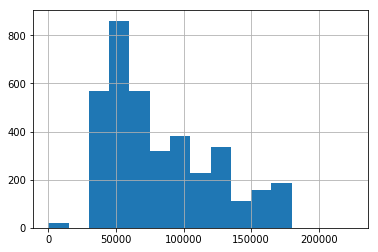

In [288]:
y1.hist(bins=15)

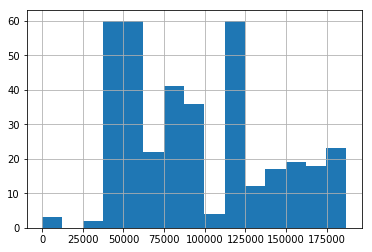

In [287]:
y2.hist(bins=15)

__9)Посчитаем долю выброса:__

In [289]:
#Обама
q1 = y1.quantile(0.25)
q3 = y1.quantile(0.75)

iqr = q3 - q1

boxplot_range = (q1 - 1.5 * iqr, q3 + 1.5 * iqr)
boxplot_range

(-44161.0, 206935.0)

In [290]:
outliers = df1.loc[(y1 < boxplot_range[0]) | (y1 > boxplot_range[1])]
outliers.shape[0]

1

In [293]:
outliers.shape[0] / y1.shape[0]

0.00026737967914438503

In [294]:
#Трамп
q1 = y2.quantile(0.25)
q3 = y2.quantile(0.75)

iqr = q3 - q1

boxplot_range = (q1 - 1.5 * iqr, q3 + 1.5 * iqr)
boxplot_range

(-38500.0, 213500.0)

In [295]:
outliers = df2.loc[(y2 < boxplot_range[0]) | (y2 > boxplot_range[1])]
outliers.shape[0]

0

In [296]:
outliers.shape[0] / df1.shape[0]

0.0

In [414]:
#В выборках нет выбросов

__10)Проверить гипотезу о равенстве средних зарплат за каждый год:__

1) $n$ общее число наблюдений:

In [297]:
#за каждый год Обама
n2009 = y2009.count()
n2010 = y2010.count()
n2011 = y2011.count()
n2012 = y2012.count()
n2013 = y2013.count()
n2014 = y2014.count()
n2015 = y2015.count()
n2016 = y2016.count()

In [298]:
#Трамп
n2 = y2.count()

2) Среднее от всей выборки:

In [299]:
y = np.concatenate([y2009, y2010, y2011, y2012, y2013, y2014, y2015, y2016, y2])
y_mean = y.mean()
y_mean

83624.52659703667

3) Сумма квадратов отклонений средних групповых значений от общего среднего значения $\overline{y}$:
$$S_F^2 = \displaystyle\sum_{i=1}^k (\overline{y}_i - \overline{y})^2 n_i$$
Остаточная сумма квадратов отклонений:
$$S_{res}^{2} = \displaystyle\sum_{i=1}^k \displaystyle\sum_{j=1}^{n_i} (y_{ij} - \overline{y}_i)^2.$$

In [212]:
S2_F = n2009*(y2009_mean-y_mean)**2+n2010*(y2010_mean-y_mean)**2+n2011*(y2011_mean-y_mean)**2+n2012*(y2012_mean-y_mean)**2+n2013*(y2013_mean-y_mean)**2+n2014*(y2014_mean-y_mean)**2+n2015*(y2015_mean-y_mean)**2+n2016*(y2016_mean-y_mean)**2+n2*(y2_mean-y_mean)**2
S2_F

60355391414.89724

In [301]:
S2_res = ((y2009-y2009_mean)**2).sum()+((y2010-y2010_mean)**2).sum()+((y2011-y2011_mean)**2).sum()+((y2012-y2012_mean)**2).sum()+((y2013-y2013_mean)**2).sum()+((y2014-y2014_mean)**2).sum()+((y2015-y2015_mean)**2).sum()+((y2016-y2016_mean)**2).sum()+((y2-y2_mean)**2).sum()
S2_res

6697911880767.439

4) Сумма квадратов отклонений наблюдений от общего среднего:
$$S^2 = \displaystyle\sum_{i=1}^{k} \displaystyle\sum_{j=1}^{n_i} ({y}_{ij} - \overline{y})^2.$$
Для этих значений должно быть справедливо равенство:
$$S^2 = S_F^2 + S_{res}^2.$$

In [218]:
S_2 = ((y - y_mean) ** 2).sum()
S_2

6758267272182.338

In [217]:
S2_F+S2_res

6758267272182.337

5) Несмещённые оценки дисперсий:
$$\sigma_F^2 = \dfrac{S_F^2}{k - 1}, \: \sigma_{res}^2 = \dfrac{S_{res}^2}{n - k}.$$

In [219]:
k = 9
n = n2009 + n2010 + n2011 + n2012 + n2013 + n2014 + n2015 + n2016 + n2

k1 = k - 1
k2 = n - k

sigma2_F = S2_F / k1
sigma2_res = S2_res / k2

sigma2_F, sigma2_res

(7544423926.862155, 1630455667.1780524)

6) Для проверки гипотезы $H_0$ запишем статистику
$$T = \dfrac{\sigma_F^2}{\sigma_{res}^2}.$$

In [220]:
T = sigma2_F / sigma2_res
T

4.627187404561472

Зафиксируем уровень значимости $\alpha = 0.05$. Для него найдём критическое значение $F_{crit}$:

In [221]:
from scipy import stats
alpha = 0.05

F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

1.9406582344440286

Видим, что $T > F_{crit}$, гипотеза о равенстве средних зарплат отвергается. Отличие средних зарплат является статистически значимым.